In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from string import punctuation

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Spam Mail Dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df["text"]

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [10]:
df["text"] = df["text"].str.replace("Subject: ", "").str.replace("\r\n", " ")

In [12]:
dummy = []
for i in df["text"]:
    temp = []
    txt_ls = i.split()
    for j in txt_ls:
        if j.isalpha() and j not in punctuation:
            temp.append(j)
    dummy.append(" ".join(temp))

In [14]:
len(dummy)

5171

In [15]:
cv = CountVectorizer(stop_words="english")

In [18]:
text_vector = cv.fit_transform(dummy)

In [19]:
text_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 295416 stored elements and shape (5171, 45375)>

In [20]:
cv.vocabulary_

{'enron': 13922,
 'methanol': 26162,
 'meter': 26155,
 'follow': 16036,
 'note': 28312,
 'gave': 16939,
 'monday': 26845,
 'preliminary': 31750,
 'flow': 15925,
 'data': 10513,
 'provided': 32291,
 'daren': 10456,
 'override': 29565,
 'pop': 31384,
 'daily': 10358,
 'volume': 42842,
 'presently': 31815,
 'zero': 45104,
 'reflect': 33711,
 'activity': 436,
 'obtain': 28647,
 'gas': 16884,
 'control': 9170,
 'change': 7142,
 'needed': 27730,
 'asap': 2511,
 'economics': 13113,
 'purposes': 32535,
 'hpl': 19638,
 'nom': 28190,
 'january': 21804,
 'attached': 2795,
 'file': 15570,
 'hplnol': 19645,
 'xls': 44471,
 'neon': 27796,
 'retreat': 34363,
 'ho': 19298,
 'wonderful': 43946,
 'time': 40182,
 'year': 44723,
 'leaders': 23753,
 'know': 23080,
 'extremely': 14936,
 'hectic': 18814,
 'tough': 40547,
 'think': 39971,
 'past': 30022,
 'holidays': 19353,
 'life': 24091,
 'does': 12233,
 'week': 43368,
 'december': 10750,
 'like': 24133,
 'minute': 26507,
 'calender': 6168,
 'handed': 18429

In [25]:
label = df['label']

In [26]:
X_tr, X_te, y_tr, y_te = train_test_split(text_vector, label, train_size=0.7, random_state=45)

In [27]:
mnb = MultinomialNB()

In [29]:
mnb.fit(X_tr, y_tr)

MultinomialNB()

In [30]:
mnb.score(X_tr, y_tr)

0.9900525006907985

In [31]:
y_pred = mnb.predict(X_te)

In [32]:
accuracy_score(y_te, y_pred)

0.9748711340206185

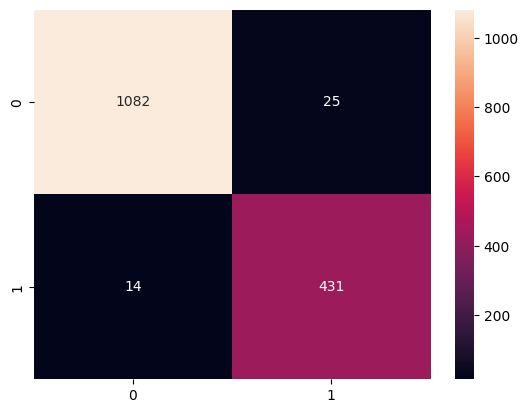

In [36]:
sns.heatmap(confusion_matrix(y_te, y_pred), annot=True, fmt="d")
plt.show()

In [42]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1107
        spam       0.95      0.97      0.96       445

    accuracy                           0.97      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.97      0.97      1552



In [37]:
bnb = BernoulliNB()

In [38]:
bnb.fit(X_tr, y_tr)

BernoulliNB()

In [39]:
bnb.score(X_tr, y_tr)

0.8684719535783365

In [40]:
y_pred2 = bnb.predict(X_te)

In [41]:
accuracy_score(y_te, y_pred2)

0.8279639175257731